# Importing libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Datasets as DS
import Methods as Md
import DownstreamAnalysis as DA
from sklearn.metrics.pairwise import euclidean_distances

# Loading data

In [3]:
dir = 'D:/Research/NeuroDAVIS/Results/HD/Comparison/'
X,y = DS.LoadData('Spam')

In [4]:
X.shape

(5572, 513)

In [5]:
np.unique(y)

array([0, 1], dtype=int64)

In [6]:
c1=list(np.unique(y))
c2=['c','r']
cols = map(lambda x: c2[c1.index(x)], y)
cs = [i for i in list(cols)]

# Applying T-SNE

In [7]:
X_tsne = Md.UseMethod('TSNE', X)

# Plotting the results

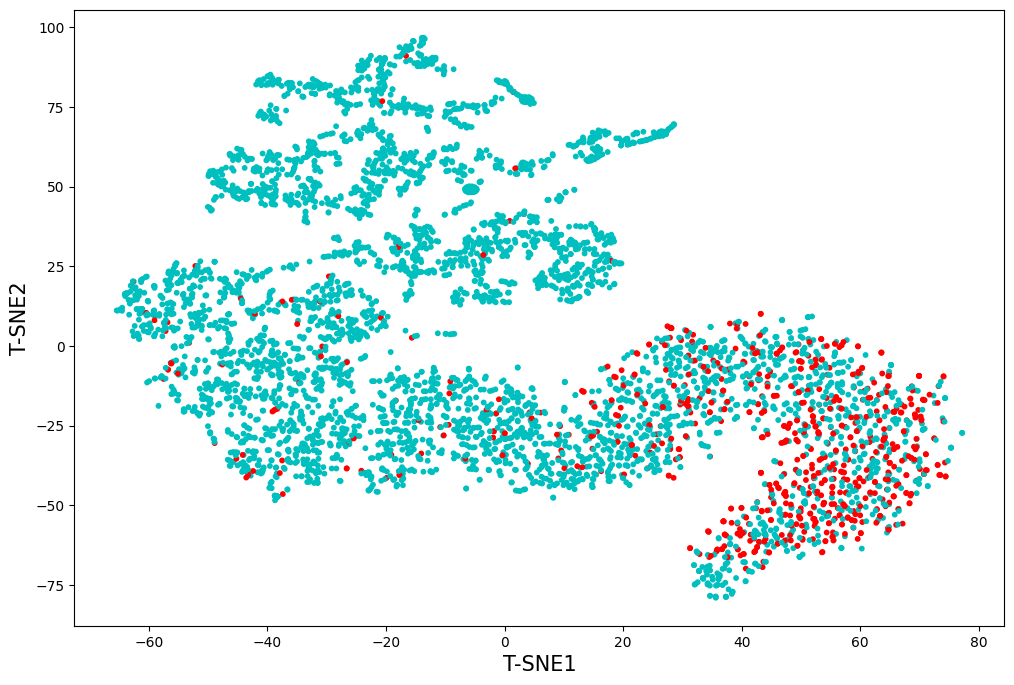

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=cs,s=10)
plt.xlabel("T-SNE1", fontsize = 15)
plt.ylabel("T-SNE2", fontsize = 15)
plt.savefig(dir+'Spam_tSNE.eps', dpi = 1200, format = 'eps')

# Applying UMAP

In [9]:
X_umap = Md.UseMethod('UMAP', X)

# Plotting the results

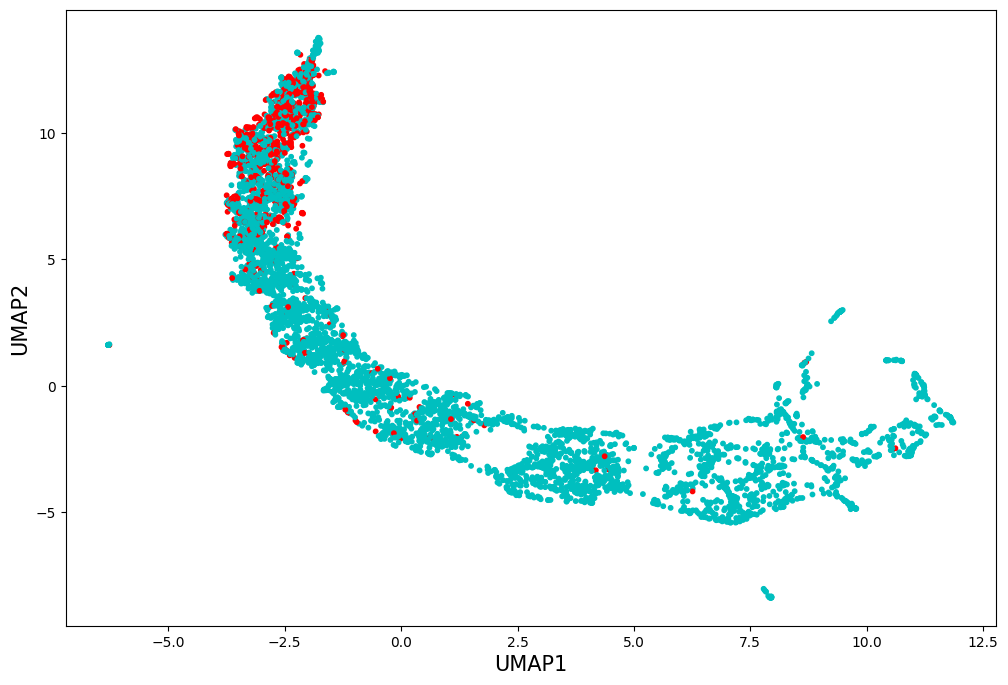

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(X_umap[:,0],X_umap[:,1],c=cs,s=10)
plt.xlabel("UMAP1", fontsize = 15)
plt.ylabel("UMAP2", fontsize = 15)
plt.savefig(dir+'Spam_UMAP.eps', dpi = 1200, format = 'eps')

# Spearman correlation

In [11]:
iteration = 10
score_tsne = []
score_umap = []
dist_orig = np.square(euclidean_distances(X, X)).flatten()
for i in range(iteration):
    print("Iteration {}".format(i+1))
    print("----TSNE")
    X_tsne = Md.UseMethod('TSNE', X)
    dist_method = np.square(euclidean_distances(X_tsne, X_tsne)).flatten()
    score_tsne.append(DA.correlation(dist_orig, dist_method))
    print("----UMAP")
    X_umap = Md.UseMethod('UMAP', X)
    dist_method = np.square(euclidean_distances(X_umap, X_umap)).flatten()
    score_umap.append(DA.correlation(dist_orig, dist_method))

Iteration 1
----TSNE
----UMAP
Iteration 2
----TSNE
----UMAP
Iteration 3
----TSNE
----UMAP
Iteration 4
----TSNE
----UMAP
Iteration 5
----TSNE
----UMAP
Iteration 6
----TSNE
----UMAP
Iteration 7
----TSNE
----UMAP
Iteration 8
----TSNE
----UMAP
Iteration 9
----TSNE
----UMAP
Iteration 10
----TSNE
----UMAP


In [12]:
result = pd.DataFrame(list(zip(score_tsne, score_umap)),
               columns =['T-SNE','Umap'])
result

,T-SNE,Umap
0,0.568214,0.572085
1,0.633942,0.549237
2,0.596902,0.579777
3,0.588630,0.571300
4,0.573690,0.563523
5,0.602661,0.576132
6,0.571083,0.574918
7,0.563851,0.574980
8,0.597749,0.567259
9,0.626245,0.571811
